# 用ppo算法通关超级玛丽

### 为什么是ppo？
ppo算法作为强化学习领域out of art的算法，如果你要学习强化学习的话 ppo会是你最常用的算法。openai早已把ppo 作为自己的默认算法，所以我希望你能认真学完ppo算法并为自己所用。
### 强化学习是什么？
简单来说 强化学习是一类通过不断与环境交互来学习如何达到设定目标的一类算法，比如走迷宫，传统的运筹学算法往往是通过遍历所有的点来完成路径规划，而强化学习则是实现一个anget,让这个
agent自己去随机探索路线，在探索的过程中学习如何走的更远并最终走到终点，这就是强化学习的思想。


### R0 ppo玩超级玛丽1-1关的视频
#麻烦生成一张gif图片放在这里
![avatar](images/20201020171212.jpg)
#
#
#
###待补充


### R1   先来学习如何用代码实现随机动作play超级玛丽游戏（5 min）


In [3]:
#安装实验需要的软件包
!pip install gym gym_super_mario_bros cv2

Looking in indexes: http://mirrors.cloud.aliyuncs.com/pypi/simple/
  ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [4]:
#导入实验需要的包
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [5]:
#使用gym_super_mario_bros包函数创建游戏环境env
env = gym_super_mario_bros.make('SuperMarioBros-v0')

In [6]:
#指定环境为简单模式（动作简化，去除一些左上、左下等复杂动作）
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [7]:
#使用gym的wrapper函数对游戏视频进行录像（由于notebook不支持display，我们录像后播放观看）
from gym import wrappers
env = wrappers.Monitor(env,"./gym-results", force=True)

In [8]:
#执行5000个简单的向右随机操作 
done = True #游戏结束标志
for step in range(5000):
    if done:
        #如果游戏结束则重置：
        state = env.reset() 
    state, reward, done, info = env.step(env.action_space.sample())

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [9]:
# 关闭创建的游戏env
env.close()

In [ ]:
注：此处主要对如何在代码中运行游戏有个感知，每个env相关的函数参数意义详见R3.2章节环境讲解部分

### R1.1 通过网页播放出来刚才的运行实况

In [10]:
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

### R1.2 随机动作play超级玛丽的完整代码

In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

#借助包gym_super_mario_bros创建
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
from gym import wrappers
env = wrappers.Monitor(env,"./gym-results", force=True)

done = True
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
#     env.render()

env.close()


/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [3]:
#通过网页播放出来刚才的运行实况
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

#### 番外篇，用键盘玩超级玛丽：
gym_super_mario_bros -e <the environment ID to play> -m <`human` or `random`>

## R2 完整代码通关play超级玛丽(10 min)

In [4]:
#下载我提前训练好的权重和代码
!git clone ....
!cd auper_ppo

In [ ]:
#运行play测试程序
!python test.py

In [16]:
#查看运行录像
video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

#### 本地运行方法：本地可以使用docker一键运行，docker的好处是已经包含了环境，可直接运行。
link：supermrio.readthedoc.com

### R3 认识环境

强化学习中的环境就等同于深度学习或者数据挖掘课题的“数据”，强化学习通过与环境交互来产生数据，所以对环境的认知直接关系到最终结果的好坏，在很多强化学习的研究和竞赛里往往对环境的trick比算法的改进效果更为明显。

### R3.1 （由浅入深）倒立摆环境（carplot）讲解

运行一个倒立摆环境（CartPole） 观察环境返回什么 环境的动作有哪些？
#补一个倒立摆的GIF图


In [26]:
#创建倒立摆'CartPole-v0' env
import gym
env = gym.make('CartPole-v0')


In [27]:
#初始化游戏环境
env.reset()

array([-0.03581067,  0.02327651, -0.026976  ,  0.02737822])

In [ ]:
从上面的返回可以看到我们在执行环境初始化\重置时env返回给我们了初始化后的环境状态为：
[ 0.03749292, -0.03226631,  0.01609263, -0.04661368]
这四个数字组成的状态变量（state variables）分别含义如下：

0.03749292： 小车在轨道上的位置（position of the cart on the track）
-0.03226631： 杆子与竖直方向的夹角（angle of the pole with the vertical）
0.01609263： 小车速度（cart velocity）
-0.04661368： 角度变化率（rate of change of the angle）

In [32]:
#环境包含的动作有哪些？
print("env.action_space: ", env.action_space)

env.action_space:  Discrete(2)


从结果来看动作空间为2，也就是说倒立摆这个环境只有两个动作可以操作，分别是0和1 （向左和向右）从倒立摆的动画不难理解，通过左右移动来保持倒立摆不倒。

In [36]:
#执行一个向左的操作
obj, reward, done, info = env.step(1) #1 向右 0向左
print("obj", obj)
print("reward", reward)
print("done", done)
print("info", info)

obj [-0.02268437  0.60981794 -0.04339413 -0.87715228]
reward 1.0
done False
info {}


一个动作执行后，环境会返回四个变量（obj:新的状态（对照前面环境初始化的状态理解）、reward：指定该动作获得的奖励值（在游戏中的得分）、done:回合是否结束（你控制的小人是不是死了，对应回合结束）、info:额外信息（该游戏较简单，info为空））

In [42]:
#随机获取一个动作
action = env.action_space.sample()
print(action)

0


In [ ]:
通过sample（）函数可以快速得到一个随机动作，由于该游戏动作空间为2，所以sample得到的值为0或1

In [67]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [ ]:
#运行1000组随机动作
env = gym.make('CartPole-v0')
from gym import wrappers
env = wrappers.Monitor(env,"./", force=True)
env.reset()
for _ in range(1000):
    env.render() #服务器上无display,不支持render
    obj, reward, done, info = env.step(env.action_space.sample()) # take a random action
    if done:
        env.reset()
env.close()


# from IPython import display
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline

# env = gym.make('CartPole-v0')
# env.reset()
# img = plt.imshow(env.render(mode='rgb_array')) # only call this once
# for _ in range(100):
#     img.set_data(env.render(mode='rgb_array')) # just update the data
#     display.display(plt.gcf())
#     display.clear_output(wait=True)
#     action = env.action_space.sample()
#     env.step(action)

In [ ]:
import gym
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env,"./gym-results")#, force=True
env.reset()
for _ in range(1000):
#     env.render() #服务器上无display,不支持render
    obj, reward, done, info = env.step(env.action_space.sample()) # take a random action
    if done:
        env.reset()
env.close()

### R3.2 超级玛丽环境讲解

超级玛丽主要区别于倒立摆游戏的是超级玛丽的obj观测值（状态）为当前帧图片（像素），和人类玩超级玛丽一致，通过观察每一帧图像（大脑/模型）输出要执行的action

In [82]:
#创建env
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

#借助包gym_super_mario_bros创建
env = gym_super_mario_bros.make('SuperMarioBros-v0')


In [ ]:
注：SuperMarioBros-<world>-<stage>-v<version>
其中：

<world>是{1，2，3，4，5，6，7，8}中的一个数字，表示世界
<stage>是{1，2，3，4}中的一个数字，表示一个世界中的阶段
<version>是{0，1，2，3}中的一个数字，指定要使用的rom模式
0：标准ROM
1:降采样ROM
2：像素rom
3：矩形ROM

In [83]:
#初始化env
obj = env.reset()
print(obj.shape)

(240, 256, 3)


In [ ]:
由输出可以看到超级玛丽的观测值变成了一张240*256的rgb图片
为了验证，我们可视化出来

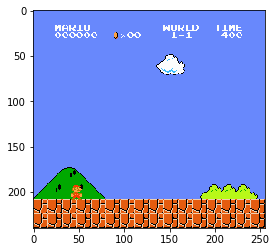

In [84]:
import matplotlib.pyplot as plt
plt.imshow(obj)

In [85]:
#接下来看一下动作空间
print("env.action_space: ", env.action_space)

env.action_space:  Discrete(256)


默认情况下， gym_super_mario_bros环境使用完整的NES操作空间256 离散动作。为了解决这个问题，gym_super_mario_bros.actions提供 三个操作列表（RIGHT_ONLY、SIMPLE_MOVEMENT和COMPLEX_MOVEMENT） 对于nes_py.wrappers.JoypadSpace包装器

In [86]:
#我们选用SIMPLE_MOVEMENT来看下是否满足我们的通关需求
env = JoypadSpace(env, SIMPLE_MOVEMENT)
print("env.action_space: ", env.action_space)

env.action_space:  Discrete(7)


7个基本动作包含了常用的操作 如上下左右，跳跃，右+跳，左+跳。由此其实已经基本满足了常用的操作，而选择更多的动作反而会增加模型学习的难度。所以我们选择SIMPLE_MOVEMENT模式即可

In [88]:
#随机执行一个操作
obj, reward, done, info = env.step(1) #这里随机选择执行动作1
print("obj.shape", obj.shape)
print("reward", reward)
print("done", done)
print("info", info)

obj.shape (240, 256, 3)
reward 0
done False
info {'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'x_pos_screen': 40, 'y_pos': 79}


强化学习执行step动作的返回一般是标准的，所以这里的返回同前面的倒立摆，动作执行后，环境返回四个变量（obj:新的观测值（一帧rgb图片）、reward：执行该动作获得的奖励值（在游戏中的得分）、done:回合是否结束（你控制的小人是不是死了，对应回合结束）、info:额外信息（比如'life': 2，剩余2条命等））
详细字段解释，参见https://www.cnpython.com/pypi/gym-super-mario-bros

In [ ]:
##留一个空位 看下是否讲解reward

### R3.3常用env Wrapper技巧

In [91]:
#先重新引入下相关包，防止报错
import gym_super_mario_bros
from gym.spaces import Box
from gym import Wrapper
from nes_py.wrappers import JoypadSpace#BinarySpaceToDiscreteSpaceEnv
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT, COMPLEX_MOVEMENT, RIGHT_ONLY
import cv2
import numpy as np
import subprocess as sp

#### R3.3.1 rgb图像转灰度图
想象一下你在玩超级玛丽时如果把彩色图像换成灰度图，其实对你的操作并没有多大影响（只要能看出来障碍物即可判断路线和动作），反而在模型训练中，rgb图像对算力和训练时间的要求会成倍增长，所以综合考虑咱们转换成灰度图才输入网络

In [92]:
#借助cv2即（opencv）包快速转换COLOR_RGB2GRAY
def process_frame(frame):
    if frame is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) #图像转换
        frame = cv2.resize(frame, (84, 84))[None, :, :] / 255. #裁剪合适大小，并归一化
        return frame
    else:
        return np.zeros((1, 84, 84))

#### R3.3.2 SkipFrame
由于超级玛丽等游戏开发是面向玩家的（人），而非电脑，所以面向人类通关设计时，很多游戏帧是被放慢了，比如执行一个action并不会立刻得到reard而是在接下来的几帧里才逐渐成效，换个通俗的说法，其实这么快速的游戏帧对我们并不需要，我们只需要每秒能看到几帧就足以通关了，所以我们根据经验，每四帧只取一帧即可

In [93]:
class CustomSkipFrame(Wrapper):
    def __init__(self, env, skip=4):
        super(CustomSkipFrame, self).__init__(env)
        self.observation_space = Box(low=0, high=255, shape=(4, 84, 84))
        self.skip = skip

    def step(self, action):
        total_reward = 0
        states = []
        state, reward, done, info = self.env.step(action)
        for i in range(self.skip):
            if not done:
                state, reward, done, info = self.env.step(action)
                total_reward += reward
                states.append(state)
            else:
                states.append(state)
        states = np.concatenate(states, 0)[None, :, :, :]
        return states.astype(np.float32), reward, done, info

    def reset(self):
        state = self.env.reset()
        states = np.concatenate([state for _ in range(self.skip)], 0)[None, :, :, :]
        return states.astype(np.float32)

#### R3.3.2 CustomReward
强化学习的优化目标必须是可量化的，所以在游戏里我们直接的优化目标就是最大化reward,但是很多时候游戏直接设定的reward并不完全切合我们的实际目的（比如通关），或者在某个特定场景下（关卡下）不合适，所以越是复杂的游戏场景，越是需要自定义reward来进行修正。

In [ ]:
这里我们做了几个小优化如下：
1.reward += (info["score"] - self.curr_score) / 40.
原来的reward仅包含了对“离终点更近”的奖励和“时间消耗”、”死掉“的惩罚
为了让游戏更好玩，我们添加了info["score"]，包含了对获得技能、金币的奖励，但不是重点，为了不影响整体要通关的属性，弱化他
2.if done:
            if info["flag_get"]:
                reward += 50
            else:
                reward -= 50
我们对回合结束时到达终点和未达到的奖励和惩罚进行放大，激励agent更快速的到达终点
3.这里仅仅是对reward修改的一些示例，后面自己在实战时可以自己根据实际情况进行定义，比如当agent有时陷入一个错误的路线卡住时，可以添加一个缓冲区让agent学会后退等

In [100]:
class CustomReward(Wrapper):
    def __init__(self, env=None):
        super(CustomReward, self).__init__(env)
        self.observation_space = Box(low=0, high=255, shape=(1, 84, 84))
        self.curr_score = 0

    def step(self, action):
        state, reward, done, info = self.env.step(action)
        state = process_frame(state)
        reward += (info["score"] - self.curr_score) / 40.
        self.curr_score = info["score"]
        if done:
            if info["flag_get"]:
                reward += 50
            else:
                reward -= 50
        return state, reward / 10., done, info

    def reset(self):
        self.curr_score = 0
        return process_frame(self.env.reset())

In [102]:
#至此，我们完成了超级玛丽环境的自定义，封装如下：
def create_train_env(world, stage, action_type, output_path=None):
    env = gym_super_mario_bros.make("SuperMarioBros-{}-{}-v0".format(world, stage))
    if action_type == "right":
        actions = RIGHT_ONLY
    elif action_type == "simple":
        actions = SIMPLE_MOVEMENT
    else:
        actions = COMPLEX_MOVEMENT
    env = JoypadSpace(env, actions)
    env = CustomReward(env)
    env = CustomSkipFrame(env)
    return env, env.observation_space.shape[0], len(actions)

In [105]:
#测试一下
custom_env = create_train_env(1,1,'simple')
print(custom_env)


(<CustomSkipFrame<CustomReward<JoypadSpace<TimeLimit<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>, 4, 7)


## R4 PPO（近段策略优化）算法讲解

In [ ]:
1、策略（要输出最优动作的策略模型）

2、近端（代理函数的剪裁）

3、优化（使用代理函数）的出现及其实际意义，导致了算法的命名。

### R4.1 由浅入深，简化版ppo（100行代码）

In [ ]:
#导入gym和torch相关包
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical


In [ ]:
#Hyperparameters
learning_rate = 0.0005 #学习率
gamma         = 0.98   #
lmbda         = 0.95
eps_clip      = 0.1
K_epoch       = 3
T_horizon     = 20

In [ ]:
#定义PPO架构
class PPO(nn.Module):
    def __init__(self):
        super(PPO, self).__init__()
        self.data = [] #用来存储交互数据
        
        self.fc1   = nn.Linear(4,256) #由于倒立摆环境简单，这里仅用一个线性变换来训练数据
        self.fc_pi = nn.Linear(256,2) #policy函数（输出action）的全连接层
        self.fc_v  = nn.Linear(256,1) #value函数（输出v）的全连接层
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate) #优化器

    #policy函数
    #输入观测值x
    #输出动作空间概率，从而选择最优action
    def pi(self, x, softmax_dim = 0): 
        x = F.relu(self.fc1(x))
        x = self.fc_pi(x)
        prob = F.softmax(x, dim=softmax_dim)
        return prob
    
    #value函数
    #输入观测值x
    #输出x状态下value的预测值（reward）,提供给policy函数作为参考值
    def v(self, x):
        x = F.relu(self.fc1(x))
        v = self.fc_v(x)
        return v
    
    #把交互数据存入buffer
    def put_data(self, transition):
        self.data.append(transition)
        
    #把数据形成batch，训练模型时需要一个一个batch输入模型
    def make_batch(self):
        s_lst, a_lst, r_lst, s_prime_lst, prob_a_lst, done_lst = [], [], [], [], [], []
        for transition in self.data:
            s, a, r, s_prime, prob_a, done = transition
            
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            prob_a_lst.append([prob_a])
            done_mask = 0 if done else 1
            done_lst.append([done_mask])
            
        s,a,r,s_prime,done_mask, prob_a = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
                                          torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
                                          torch.tensor(done_lst, dtype=torch.float), torch.tensor(prob_a_lst)
        self.data = []
        return s, a, r, s_prime, done_mask, prob_a
    
    
    #训练模型
    
    def train_net(self):
        #make batch 数据，喂给模型
        s, a, r, s_prime, done_mask, prob_a = self.make_batch()

        for i in range(K_epoch): #K_epoch：训练多少个epoch
            #计算td_error 误差，value模型的优化目标就是尽量减少td_error
            td_target = r + gamma * self.v(s_prime) * done_mask
            delta = td_target - self.v(s)
            delta = delta.detach().numpy()

            #计算advantage:
            #即当前策略比一般策略（baseline）要好多少
            #policy的优化目标就是让当前策略比baseline尽量好，但是每次更新时又不能偏离太多，所以后面会有个clip
            advantage_lst = []
            advantage = 0.0
            for delta_t in delta[::-1]:
                advantage = gamma * lmbda * advantage + delta_t[0]
                advantage_lst.append([advantage])
            advantage_lst.reverse()
            advantage = torch.tensor(advantage_lst, dtype=torch.float)

            #计算ratio 防止单词更新偏离太多
            pi = self.pi(s, softmax_dim=1)
            pi_a = pi.gather(1,a)
            ratio = torch.exp(torch.log(pi_a) - torch.log(prob_a))  # a/b == exp(log(a)-log(b))

            #通过clip 保证ratio在（1-eps_clip, 1+eps_clip）范围内
            surr1 = ratio * advantage
            surr2 = torch.clamp(ratio, 1-eps_clip, 1+eps_clip) * advantage
            #这里简化ppo，把policy loss和value loss放在一起计算
            loss = -torch.min(surr1, surr2) + F.smooth_l1_loss(self.v(s) , td_target.detach())

            #梯度优化
            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()

In [ ]:
#主函数：简化ppo 这里先交互T_horizon个回合然后停下来学习训练，再交互，这样循环10000次
def main():
    #创建倒立摆环境
    env = gym.make('CartPole-v1')
    model = PPO()
    score = 0.0
    print_interval = 20

    #主循环
    for n_epi in range(10000):
        s = env.reset()
        done = False
        while not done:
            for t in range(T_horizon):
                #由当前policy模型输出最优action
                prob = model.pi(torch.from_numpy(s).float())
                m = Categorical(prob)
                a = m.sample().item()
                #用最优action进行交互
                s_prime, r, done, info = env.step(a)

                #存储交互数据，等待训练
                model.put_data((s, a, r/100.0, s_prime, prob[a].item(), done))
                s = s_prime

                score += r
                if done:
                    break

            #模型训练
            model.train_net()

        #打印每轮的学习成绩
        if n_epi%print_interval==0 and n_epi!=0:
            print("# of episode :{}, avg score : {:.1f}".format(n_epi, score/print_interval))
            score = 0.0

    env.close()

if __name__ == '__main__':
    main()

### R4.2 openai版本ppo算法实践 （训练超级玛丽）


通过上面简化版本的ppo玩倒立摆，你已经对ppo有了简单的认知，但是上面的做法还有很多待改进的地方，比如模型太简单，如果像超级玛丽这种观测值是图像的话，简单的线性变换肯定不满足条件
、策略模型和value模型应该分开优化损失，因为policy和value的loss很多情况下数值是差别很大的，小的那个往往得不到有效优化等
接下来介绍openai 官方版本的ppo怎么实现

In [6]:
#3.然后我们来设计ppo算法来实现马里奥通关
#3.1 先创建游戏环境（
#    a.组合定义action
#    b.重定义reward
#    c.堆叠zhenlv
#    d.预处理输入的图像
#    ）
    

In [7]:
#导入相关包
import gym_super_mario_bros
from gym.spaces import Box
from gym import Wrapper
from nes_py.wrappers import JoypadSpace#BinarySpaceToDiscreteSpaceEnv
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT, COMPLEX_MOVEMENT, RIGHT_ONLY
import cv2
import numpy as np
import subprocess as sp

In [1]:
class Monitor:
    def __init__(self, width, height, saved_path):

        self.command = ["ffmpeg", "-y", "-f", "rawvideo", "-vcodec", "rawvideo", "-s", "{}X{}".format(width, height),
                        "-pix_fmt", "rgb24", "-r", "80", "-i", "-", "-an", "-vcodec", "mpeg4", saved_path]
        try:
            self.pipe = sp.Popen(self.command, stdin=sp.PIPE, stderr=sp.PIPE)
        except FileNotFoundError:
            pass

    def record(self, image_array):
        self.pipe.stdin.write(image_array.tostring())


def process_frame(frame):
    if frame is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = cv2.resize(frame, (84, 84))[None, :, :] / 255.
        return frame
    else:
        return np.zeros((1, 84, 84))


class CustomReward(Wrapper):
    def __init__(self, env=None, monitor=None):
        super(CustomReward, self).__init__(env)
        self.observation_space = Box(low=0, high=255, shape=(1, 84, 84))
        self.curr_score = 0
        if monitor:
            self.monitor = monitor
        else:
            self.monitor = None

    def step(self, action):
        state, reward, done, info = self.env.step(action)
        if self.monitor:
            self.monitor.record(state)
        state = process_frame(state)
        reward += (info["score"] - self.curr_score) / 40.
        self.curr_score = info["score"]
        if done:
            if info["flag_get"]:
                reward += 50
            else:
                reward -= 50
        return state, reward / 10., done, info

    def reset(self):
        self.curr_score = 0
        return process_frame(self.env.reset())


class CustomSkipFrame(Wrapper):
    def __init__(self, env, skip=4):
        super(CustomSkipFrame, self).__init__(env)
        self.observation_space = Box(low=0, high=255, shape=(4, 84, 84))
        self.skip = skip

    def step(self, action):
        total_reward = 0
        states = []
        state, reward, done, info = self.env.step(action)
        for i in range(self.skip):
            if not done:
                state, reward, done, info = self.env.step(action)
                total_reward += reward
                states.append(state)
            else:
                states.append(state)
        states = np.concatenate(states, 0)[None, :, :, :]
        return states.astype(np.float32), reward, done, info

    def reset(self):
        state = self.env.reset()
        states = np.concatenate([state for _ in range(self.skip)], 0)[None, :, :, :]
        return states.astype(np.float32)


def create_train_env(world, stage, action_type, output_path=None):
    env = gym_super_mario_bros.make("SuperMarioBros-{}-{}-v0".format(world, stage))
    if output_path:
        monitor = Monitor(256, 240, output_path)
    else:
        monitor = None
    if action_type == "right":
        actions = RIGHT_ONLY
    elif action_type == "simple":
        actions = SIMPLE_MOVEMENT
    else:
        actions = COMPLEX_MOVEMENT
    env = JoypadSpace(env, actions)
    env = CustomReward(env, monitor)
    env = CustomSkipFrame(env)
    return env, env.observation_space.shape[0], len(actions)

NameError: name 'Wrapper' is not defined

In [9]:
#5.创建ppo算法
#5.1创建ac

In [10]:
import numpy as np
import scipy.signal
from gym.spaces import Box, Discrete

import torch
import torch.nn as nn
from torch.distributions.normal import Normal
from torch.distributions.categorical import Categorical
import torch.nn.functional as F

In [11]:
def combined_shape(length, shape=None):
    if shape is None:
        return (length,)
    return (length, shape) if np.isscalar(shape) else (length, *shape)

In [12]:
#定义通用cnn model类
class cnn_model(nn.Module):
    def __init__(self, num_inputs, num_out, activation=nn.ReLU):
        super(cnn_model, self).__init__()
        self.conv1 = nn.Conv2d(num_inputs, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 32, 3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(32, 32, 3, stride=2, padding=1)
        self.lstm = nn.Linear(32 * 6 * 6, 512)
        # self.critic_linear = nn.Linear(512, 1)
        # self.actor_linear = nn.Linear(512, num_actions)
        self.fc_out = nn.Linear(512, num_out)
        self._initialize_weights()

    def _initialize_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                # nn.init.kaiming_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.LSTMCell):
                nn.init.constant_(module.bias_ih, 0)
                nn.init.constant_(module.bias_hh, 0)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.lstm(x))
        out = self.fc_out(x)
        return out


In [13]:
#utils:
def count_vars(module):
    return sum([np.prod(p.shape) for p in module.parameters()])

def discount_cumsum(x, discount):
    return scipy.signal.lfilter([1], [1, float(-discount)], x[::-1], axis=0)[::-1]

In [14]:
class userActor(nn.Module):

    def __init__(self, obs_dim, act_dim, hidden_sizes, activation):
        super().__init__()
        self.logits_net = cnn_model(obs_dim, act_dim, activation=activation)
        print(self.logits_net)

    def forward(self, obs, act=None):
        pi = Categorical(logits=self.logits_net(obs))
        logp_a = None
        if act is not None:
            logp_a = pi.log_prob(act)
        return pi, logp_a

In [15]:
class userCritic(nn.Module):

    def __init__(self, obs_dim, hidden_sizes, activation):
        super().__init__()
        self.v_net = cnn_model(obs_dim, 1, activation=activation)#cnn_net([obs_dim] + list(hidden_sizes) + [1], activation)
        print(self.v_net)

    def forward(self, obs):
        return torch.squeeze(self.v_net(obs), -1) # Critical to ensure v has right shape.



In [16]:
#5.3定义ppo


In [17]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
import gym
import time
import scipy.signal
# import spinup.algos.pytorch.ppo.core as core
# from core_1 import Actor, Critic
from core import userCritic, userActor
from env import create_train_env
from spinup.utils.logx import EpochLogger
from spinup.utils.mpi_pytorch import setup_pytorch_for_mpi, sync_params, mpi_avg_grads
from spinup.utils.mpi_tools import mpi_fork, mpi_avg, proc_id, mpi_statistics_scalar, num_procs

device = torch.device('cuda')

In [18]:
class PPOBuffer:
    """
    A buffer for storing trajectories experienced by a PPO agent interacting
    with the environment, and using Generalized Advantage Estimation (GAE-Lambda)
    for calculating the advantages of state-action pairs.
    """

    def __init__(self, obs_dim, act_dim, size, gamma=0.99, lam=0.95):
        self.obs_buf = np.zeros(combined_shape(size, obs_dim), dtype=np.float32)
        self.act_buf = np.zeros(combined_shape(size, act_dim), dtype=np.float32)
        self.adv_buf = np.zeros(size, dtype=np.float32)
        self.rew_buf = np.zeros(size, dtype=np.float32)
        self.ret_buf = np.zeros(size, dtype=np.float32)
        self.val_buf = np.zeros(size, dtype=np.float32)
        self.logp_buf = np.zeros(size, dtype=np.float32)
        self.gamma, self.lam = gamma, lam
        self.ptr, self.path_start_idx, self.max_size = 0, 0, size

    def store(self, obs, act, rew, val, logp):
        """
        Append one timestep of agent-environment interaction to the buffer.
        """
        assert self.ptr < self.max_size     # buffer has to have room so you can store
        self.obs_buf[self.ptr] = obs
        self.act_buf[self.ptr] = act
        self.rew_buf[self.ptr] = rew
        self.val_buf[self.ptr] = val
        self.logp_buf[self.ptr] = logp
        self.ptr += 1

    def finish_path(self, last_val=0):
        """
        Call this at the end of a trajectory, or when one gets cut off
        by an epoch ending. This looks back in the buffer to where the
        trajectory started, and uses rewards and value estimates from
        the whole trajectory to compute advantage estimates with GAE-Lambda,
        as well as compute the rewards-to-go for each state, to use as
        the targets for the value function.

        The "last_val" argument should be 0 if the trajectory ended
        because the agent reached a terminal state (died), and otherwise
        should be V(s_T), the value function estimated for the last state.
        This allows us to bootstrap the reward-to-go calculation to account
        for timesteps beyond the arbitrary episode horizon (or epoch cutoff).
        """

        path_slice = slice(self.path_start_idx, self.ptr)
        rews = np.append(self.rew_buf[path_slice], last_val)
        vals = np.append(self.val_buf[path_slice], last_val)

        # the next two lines implement GAE-Lambda advantage calculation
        deltas = rews[:-1] + self.gamma * vals[1:] - vals[:-1]
        self.adv_buf[path_slice] = discount_cumsum(deltas, self.gamma * self.lam)

        # the next line computes rewards-to-go, to be targets for the value function
        self.ret_buf[path_slice] = discount_cumsum(rews, self.gamma)[:-1]

        self.path_start_idx = self.ptr

    def get(self):
        """
        Call this at the end of an epoch to get all of the data from
        the buffer, with advantages appropriately normalized (shifted to have
        mean zero and std one). Also, resets some pointers in the buffer.
        """
        assert self.ptr == self.max_size    # buffer has to be full before you can get
        self.ptr, self.path_start_idx = 0, 0
        # the next two lines implement the advantage normalization trick
        adv_mean, adv_std = mpi_statistics_scalar(self.adv_buf)
        self.adv_buf = (self.adv_buf - adv_mean) / adv_std
        data = dict(obs=self.obs_buf, act=self.act_buf, ret=self.ret_buf,
                    adv=self.adv_buf, logp=self.logp_buf)
        #data.to(device)
        return {k: torch.as_tensor(v, dtype=torch.float32).to(device) for k,v in data.items()}

def ppo(env_fn, actor=nn.Module, critic=nn.Module, ac_kwargs=dict(), seed=0,
        steps_per_epoch=4000, epochs=50, gamma=0.99, clip_ratio=0.2, pi_lr=3e-4,
        vf_lr=1e-3, train_pi_iters=80, train_v_iters=80, lam=0.97, max_ep_len=1000,
        target_kl=0.01, logger_kwargs=dict(), save_freq=10):
    # Special function to avoid certain slowdowns from PyTorch + MPI combo.
    setup_pytorch_for_mpi()

    # Set up logger and save configuration
    logger = EpochLogger(**logger_kwargs)
    logger.save_config(locals())

    # Random seed
    seed += 10000 * proc_id()
    torch.manual_seed(seed)
    np.random.seed(seed)

    # Instantiate environment
    env = env_fn()
    obs_dim = env.observation_space.shape
    act_dim = env.action_space.n
    
    # Create actor-critic module
    ac_pi = actor(obs_dim[0], act_dim, hidden_sizes=[64, 64], activation=nn.Tanh)  # env.observation_space, env.action_space, nn.ReLU)
    ac_v = critic(obs_dim[0], hidden_sizes=[64, 64], activation=nn.Tanh)  # env.observation_space, nn.ReLU)

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cup')
    ac_pi.to(device)
    ac_v.to(device)

    # Sync params across processes
    sync_params(ac_pi)
    sync_params(ac_v)

    # Count variables
    def count_vars(module):
        return sum([np.prod(p.shape) for p in module.parameters()])
    var_counts = tuple(count_vars(module) for module in [ac_pi, ac_v])
    logger.log('\nNumber of parameters: \t pi: %d, \t v: %d\n'%var_counts)

    # Set up experience buffer
    local_steps_per_epoch = int(steps_per_epoch / num_procs())
    buf = PPOBuffer(obs_dim, env.action_space.shape, local_steps_per_epoch, gamma, lam)
    
    # Set up function for computing PPO policy loss
    def compute_loss_pi(data):
        obs, act, adv, logp_old = data['obs'], data['act'], data['adv'], data['logp']

        # Policy loss
        pi, logp = ac_pi(obs, act)
        ratio = torch.exp(logp - logp_old)
        clip_adv = torch.clamp(ratio, 1-clip_ratio, 1+clip_ratio) * adv
        loss_pi = -(torch.min(ratio * adv, clip_adv)).mean()

        # Useful extra info
        approx_kl = (logp_old - logp).mean().item()
        ent = pi.entropy().mean().item()
        clipped = ratio.gt(1+clip_ratio) | ratio.lt(1-clip_ratio)
        clipfrac = torch.as_tensor(clipped, dtype=torch.float32).mean().item()
        pi_info = dict(kl=approx_kl, ent=ent, cf=clipfrac)

        return loss_pi, pi_info

    # Set up function for computing value loss
    def compute_loss_v(data):
        obs, ret = data['obs'], data['ret']
        return ((ac_v(obs) - ret)**2).mean()

    # Set up optimizers for policy and value function
    pi_optimizer = Adam(ac_pi.parameters(), lr=pi_lr)
    vf_optimizer = Adam(ac_v.parameters(), lr=vf_lr)

    # Set up model saving
    logger.setup_pytorch_saver(ac_pi)
    
    def update():
        data = buf.get()

        pi_l_old, pi_info_old = compute_loss_pi(data)
        pi_l_old = pi_l_old.item()
        v_l_old = compute_loss_v(data).item()

        # Train policy with multiple steps of gradient descent
        for i in range(train_pi_iters):
            pi_optimizer.zero_grad()
            loss_pi, pi_info = compute_loss_pi(data)
            kl = mpi_avg(pi_info['kl'])
            if kl > 1.5 * target_kl:
                logger.log('Early stopping at step %d due to reaching max kl.'%i)
                break
            loss_pi.backward()
            mpi_avg_grads(ac_pi)    # average grads across MPI processes
            pi_optimizer.step()

        logger.store(StopIter=i)

        # Value function learning
        for i in range(train_v_iters):
            vf_optimizer.zero_grad()
            loss_v = compute_loss_v(data)
            loss_v.backward()
            mpi_avg_grads(ac_v)    # average grads across MPI processes
            vf_optimizer.step()

        # Log changes from update
        kl, ent, cf = pi_info['kl'], pi_info_old['ent'], pi_info['cf']
        logger.store(LossPi=pi_l_old, LossV=v_l_old,
                     KL=kl, Entropy=ent, ClipFrac=cf,
                     DeltaLossPi=(loss_pi.item() - pi_l_old),
                     DeltaLossV=(loss_v.item() - v_l_old))

    # Prepare for interaction with environment
    start_time = time.time()
    o, ep_ret, ep_len = env.reset(), 0, 0

    # Main loop: collect experience in env and update/log each epoch
    for epoch in range(epochs):
        for t in range(local_steps_per_epoch):
            # a, v, logp = ac.step(torch.as_tensor(o, dtype=torch.float32))
            with torch.no_grad():
                rr = torch.from_numpy(o.copy()).float().to(device)#.unsqueeze(0)
                pi, _ = ac_pi(rr, None)
                a = pi.sample()
                # logp_a = self.pi._log_prob_from_distribution(pi, a)
                logp = pi.log_prob(a)#.sum(axis=-1)
                v = ac_v(torch.as_tensor(o, dtype=torch.float32).to(device))

            next_o, r, d, _ = env.step(a.cpu().numpy().item())
            ep_ret += r
            ep_len += 1

            # save and log
            buf.store(o, a.cpu().numpy(), r, v.cpu().numpy(), logp.cpu().numpy())
            logger.store(VVals=v.cpu().numpy())

            # Update obs (critical!)
            o = next_o

            timeout = ep_len == max_ep_len
            terminal = d #or timeout
            epoch_ended = t==local_steps_per_epoch-1

            if terminal or epoch_ended:
                if epoch_ended and not(terminal):
                    print('Warning: trajectory cut off by epoch at %d steps.'%ep_len, flush=True)
                # if trajectory didn't reach terminal state, bootstrap value target
                if epoch_ended:
                    print('epoch_end')
                    # _, v, _ = ac.step(torch.as_tensor(o, dtype=torch.float32))
                    with torch.no_grad():
                        v =ac_v(torch.from_numpy(o).float().to(device)).cpu().numpy()
                else:
                    print('epret :',ep_ret)
                    v = 0
                buf.finish_path(v)
                if terminal:
                    # only save EpRet / EpLen if trajectory finished
                    logger.store(EpRet=ep_ret, EpLen=ep_len)
                o, ep_ret, ep_len = env.reset(), 0, 0


        # Save model
        if (epoch % save_freq == 0) or (epoch == epochs-1):
            logger.save_state({'env': env}, None)

        # Perform PPO update!
        update()

        # Log info about epoch
        logger.log_tabular('Epoch', epoch)
        logger.log_tabular('EpRet', with_min_and_max=True)
        logger.log_tabular('EpLen', average_only=True)
        logger.log_tabular('VVals', with_min_and_max=True)
        logger.log_tabular('TotalEnvInteracts', (epoch+1)*steps_per_epoch)
        logger.log_tabular('LossPi', average_only=True)
        logger.log_tabular('LossV', average_only=True)
        logger.log_tabular('DeltaLossPi', average_only=True)
        logger.log_tabular('DeltaLossV', average_only=True)
        logger.log_tabular('Entropy', average_only=True)
        logger.log_tabular('KL', average_only=True)
        logger.log_tabular('ClipFrac', average_only=True)
        logger.log_tabular('StopIter', average_only=True)
        logger.log_tabular('Time', time.time()-start_time)
        logger.dump_tabular()


In [25]:
if __name__ == '__main__':
    
    hid_sizes = 128
    gamma = 0.999
    seed = 0
    steps = 10000
    epochs = 150
    cpu = 1
    exp_name = "ppo"
    
    
    import os
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    mpi_fork(cpu)  # run parallel code with mpi

    from spinup.utils.run_utils import setup_logger_kwargs
    logger_kwargs = setup_logger_kwargs(exp_name, seed)
    # from baselines.common.vec_env.subproc_vec_env import SubprocVecEnv
    env_fn = lambda : create_train_env(1,1,'complex')
    # env_fn = SubprocVecEnv([])
    # env_fn = lambda : JoypadSpace(gym_super_mario_bros.make("SuperMarioBros-{}-{}-v0".format(1, 1)), gym_super_mario_bros.actions.COMPLEX_MOVEMENT)
    ppo(env_fn, actor=userActor, critic=userCritic,#core.MLPActorCritic, #gym.make(args.env)
        ac_kwargs=dict(hidden_sizes=hid_sizes), gamma=gamma,
        seed=seed, steps_per_epoch=steps, epochs=epochs,
        logger_kwargs=logger_kwargs, clip_ratio=0.2, pi_lr=0.001, vf_lr=0.001)



Logging data to /root/lele/spinningup/spinningup/data/ppo/ppo_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	128
    },
    "actor":	"userActor",
    "clip_ratio":	0.2,
    "critic":	"userCritic",
    "env_fn":	"<function <lambda> at 0x7f5601d735f0>",
    "epochs":	150,
    "exp_name":	"ppo",
    "gamma":	0.999,
    "lam":	0.97,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f5601cc5190>":	{
            "epoch_dict":	{},
            "exp_name":	"ppo",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"/root/lele/spinningup/spinningup/data/ppo/ppo_s0",
            "output_file":	{
                "<_io.TextIOWrapper name='/root/lele/spinningup/spinningup/data/ppo/ppo_s0/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
        "exp_name":	"ppo",
        "output_dir":

/root/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


cnn_model(
  (conv1): Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (lstm): Linear(in_features=1152, out_features=512, bias=True)
  (fc_out): Linear(in_features=512, out_features=12, bias=True)
)
cnn_model(
  (conv1): Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (lstm): Linear(in_features=1152, out_features=512, bias=True)
  (fc_out): Linear(in_features=512, out_features=1, bias=True)
)

Number of parameters: 	 pi: 625420, 	 v: 619777



/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : 8.49999999999997
epret : 9.59999999999997
epret : -4.199999999999999
epret : 8.099999999999984
epret : 10.099999999999966
epret : 10.899999999999945
epret : 9.89999999999997
epoch_end
Early stopping at step 6 due to reaching max kl.
---------------------------------------
|             Epoch |               0 |
|      AverageEpRet |            7.56 |
|          StdEpRet |            4.88 |
|          MaxEpRet |            10.9 |
|          MinEpRet |            -4.2 |
|             EpLen |        1.24e+03 |
|      AverageVVals |          0.0654 |
|          StdVVals |         0.00751 |
|          MaxVVals |          0.0937 |
|          MinVVals |          0.0301 |
| TotalEnvInteracts |           1e+04 |
|            LossPi |       -2.48e-09 |
|             LossV |            25.1 |
|       DeltaLossPi |         -0.0103 |
|        DeltaLossV |           -21.6 |
|           Entropy |            2.48 |
|                KL |          0.0227 |
|          ClipFrac |            0.61 |

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : 5.999999999999977
epret : -1.7999999999999998
epret : 28.750000000000178
epret : -3.6
epret : 12.30000000000004
epret : 8.349999999999975
epret : 6.89999999999999
epret : -2.599999999999998
epret : 8.24999999999998
epret : 5.349999999999989
epret : -3.8999999999999995
epoch_end
Early stopping at step 2 due to reaching max kl.
---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            5.82 |
|          StdEpRet |            9.01 |
|          MaxEpRet |            28.8 |
|          MinEpRet |            -3.9 |
|             EpLen |             771 |
|      AverageVVals |            -1.1 |
|          StdVVals |            3.89 |
|          MaxVVals |            9.05 |
|          MinVVals |           -5.38 |
| TotalEnvInteracts |           2e+04 |
|            LossPi |        6.48e-09 |
|             LossV |            23.8 |
|       DeltaLossPi |         0.00702 |
|        DeltaLossV |            -9.9 |
|           Entropy |   

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : 6.400000000000009
epret : 6.899999999999993
epret : 22.400000000000016
epret : 14.800000000000011
epret : 15.7
epret : 22.950000000000017
epret : 6.599999999999996
epret : 6.699999999999987
epret : 6.899999999999979
epret : 6.599999999999982
epret : 6.2999999999999865
epret : -1.1000000000000005
epret : -1.299999999999998
epret : 6.69999999999999
epret : -1.1999999999999993
epret : 33.200000000000045
epret : 10.499999999999993
epret : -1.3999999999999995
epret : 7.499999999999998
epret : 6.29999999999999
epret : 20.900000000000002
epret : 10.800000000000015
epret : 7.5
epret : 6.799999999999997
epret : -0.8000000000000007
epret : 9.799999999999994
epret : 11.099999999999994
epret : 8.399999999999999
epret : -1.0000000000000009
epret : 7.19999999999999
epret : 15.100000000000016
epret : 14.90000000000001
epret : 6.449999999999996
epret : 32.20000000000006
epret : 5.999999999999995
epret : 6.89999999999999
epret : -1.0000000000000009
epret : 15.600000000000023
epret : 21.64999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : 6.6
epret : 6.5000000000000036
epret : 15.000000000000014
epret : 21.60000000000001
epret : 15.00000000000001
epret : -1.1000000000000014
epret : -1.4000000000000021
epret : 6.200000000000006
epret : 9.500000000000004
epret : 7.100000000000003
epret : 6.4
epret : 6.499999999999998
epret : 6.1999999999999975
epret : -0.9000000000000012
epret : 6.599999999999998
epret : 21.600000000000026
epret : 11.400000000000002
epret : 6.799999999999997
epret : 6.399999999999995
epret : -0.9000000000000021
epret : 6.4999999999999964
epret : 9.25
epret : -1.200000000000001
epret : -1.1000000000000014
epret : 10.8
epret : 6.5000000000000036
epret : -0.9000000000000021
epret : -0.9000000000000021
epret : -0.9000000000000012
epret : 6.700000000000001
epret : 9.899999999999991
epret : 7.1999999999999975
epret : 6.300000000000006
epret : 28.500000000000007
epret : 6.999999999999989
epret : 6.499999999999989
epret : 6.699999999999994
epret : 6.000000000000002
epret : 20.95000000000004
epret : 6.1999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

/root/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.3999999999999986
epret : -1.399999999

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
#6.查看训练结果
!pwd
%matplotlib inline
!python -m spinup.run plot /root/lele/spinningup/spinningup/data/ppo/ppo_s0

/root/lele/king_ppo
Plotting from...

/root/lele/spinningup/spinningup/data/ppo/ppo_s0

/root/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
Figure(640x480)
